# Editing Features

The ArcGIS API for Python makes programmatic editing of features a breeze. In this guide, we'll cover the `edit_features()` method on the `FeatureLayer` object, which is a great way to add, update and delete features from a point feature layer. For more about the function, refer to the [reference page for the FeatureLayer class](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer) and scroll down to `edit_features()`.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Editing-Features" data-toc-modified-id="Editing-Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Editing Features</a></span><ul class="toc-item"><li><span><a href="#Query-the-features" data-toc-modified-id="Query-the-features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Query the features</a></span></li><li><span><a href="#Check-if-the-layer-can-be-edited" data-toc-modified-id="Check-if-the-layer-can-be-edited-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Check if the layer can be edited</a></span></li><li><span><a href="#Editing-features" data-toc-modified-id="Editing-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Editing features</a></span><ul class="toc-item"><li><span><a href="#Updating-features" data-toc-modified-id="Updating-features-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Updating features</a></span></li><li><span><a href="#Adding-features" data-toc-modified-id="Adding-features-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Adding features</a></span></li><li><span><a href="#Deleting-features" data-toc-modified-id="Deleting-features-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Deleting features</a></span></li></ul></li><li><span><a href="#Check-results-of-edit-operations" data-toc-modified-id="Check-results-of-edit-operations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Check results of edit operations</a></span></li></ul></li></ul></div>

Let's start by grabbing our feature layer.

In [2]:
# connect to GIS
from arcgis.gis import GIS
from IPython.display import display
gis = GIS(profile="your_online_profile")

<Item title:"Ports along the US West Coast" type:Feature Layer Collection owner:api_data_owner>
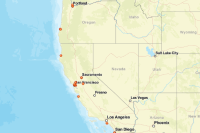

In [3]:
# search for the feature layer named Ports along west coast
portal_item = gis.content.get('e0dae2efe40a414a9700bee3a35c846b')
portal_item

In [4]:
# access the item's feature layers
ports_layer = portal_item.layers[0]
ports_layer

<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Ports_along_the_US_West_Coast/FeatureServer/0">

## Query the features
Let's query the features in the layer to see what we're working with.

In [41]:
# query all the features and display it on a map
# an empty query string will return all features or the first 1000, whichever is smaller
ports_fset = ports_layer.query()

The `sdf` property of `FeatureSet` class is a powerful way to visualize all the features as a pandas dataframe table. This creates a Spatially Enabled DataFrame, which is a Pandas DataFrame with extended spatial capabilities. More on the SeDF can be found [here.](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/)

In [42]:
ports_fset.sdf

,objectid,country,globalid,harborsize,label_position,latitude,longitude,port_name,short_form,geometry_x,geometry_y,globalid_1,SHAPE
0,1,US,{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF},L,SW,37.816667,-122.416667,SAN FRANCISCO,SFFO,-13627360,4553559,{9D3F40A8-C4C5-4C59-A82C-3C3B19373671},"{""x"": -13627361.035, ""y"": 4553559.283399999, ""..."
1,2,US,{6EE30C76-399D-42F5-B6ED-403C94DFFCD4},S,SW,37.783333,-122.266667,ALAMEDA,NGZ,-13610660,4548863,{6FD08053-6335-474A-B976-6D42A9D1D528},"{""x"": -13610663.1114, ""y"": 4548863.0858, ""spat..."
2,3,US,{A6A21CC3-DE52-4B8A-A5B2-1CAA726E7F02},L,SW,37.816667,-122.333333,OAKLAND,OAK,-13618080,45535590,{E44E1348-822A-413B-9FFE-7C49CF527027},"{""x"": -13618084.3366, ""y"": 4553559.283399999, ..."
3,4,US,{265AD7A6-4F59-4181-88DE-194F23F64E92},S,SW,37.916667,-122.366667,POINT RICHMOND,RIC,-13621800,4567660,{030877E0-580F-46D2-A2A7-66ECDD6B9093},"{""x"": -13621795.0605, ""y"": 4567660.334200002, ..."
4,5,US,{B15D545F-83DD-4D3E-9051-6D9F290A8E9E},S,SW,38.100000,-122.266667,MARE ISLAND,None,-13610660,4593562,{20B9B1A1-E243-4C82-8158-CA11A93B38C8},"{""x"": -13610663.1114, ""y"": 4593562.1065, ""spat..."
5,6,US,{A97E8B59-1E25-416E-9206-4B59A869E2F4},S,SW,38.083333,-122.250000,SOUTH VALLEJO,None,-13608810,4591205,{A18751ED-E493-44C3-A684-602488346594},"{""x"": -13608807.749499999, ""y"": 4591204.668700..."
6,7,US,{8EB57C5B-100B-4C50-B6B1-4D6B9B1C7545},S,SW,37.950000,-121.300000,STOCKTON,SCK,-13503050,4572365,{A2688CB5-CDFB-4A8A-B76F-F0AB0D1FCAAC},"{""x"": -13503054.233199999, ""y"": 4572364.8957, ..."
7,8,US,{3B7B126E-0B60-49AF-89AA-4AC05402CFEA},S,SW,38.583333,-121.500000,SACRAMENTO,SMF,-13525320,4662162,{A86D6850-70B8-43B6-BB66-73B5E4D46C48},"{""x"": -13525318.1314, ""y"": 4662162.127899997, ..."
8,9,US,{20378B4B-3E9E-47D2-AF42-4F0A31D5CA66},S,SW,40.800000,-124.183333,EUREKA,ACV,-13824030,4982886,{A01048CF-CE39-44FE-AF40-B3F792D2DE9E},"{""x"": -13824025.3946, ""y"": 4982886.316600002, ..."
9,10,US,{782C11E0-B02D-45AB-8BAD-97C1B5817812},M,SW,43.400000,-124.283333,EMPIRE,None,-13835160,5373055,{7B19D43F-DD50-48C6-BBD3-01930B3605A4},"{""x"": -13835157.3437, ""y"": 5373055.471900001, ..."


## Check if the layer can be edited
To enable a feature layer to be edited, the `edit` capability needs to be turned on for the item. This can be verified by accessing the `capabilities` property on the `FeatureLayer` object:

In [43]:
ports_layer.properties.capabilities

'Query,Sync,Extract,Editing'

## Editing features


### Updating features
From the dataframe above, we notice the short_form field of San Francisco port has a typo. We can update this by calling the `edit_features()` method on the `ports_flayer` `FeatureLayer` object. The `edit_features()` method accepts a `Feature` object with correct parameters set.

In [44]:
ports_features = ports_fset.features

# select San Francisco feature
sfo_feature = [f for f in ports_features if f.attributes['port_name']=='SAN FRANCISCO'][0]
sfo_feature.attributes

{'objectid': 1,
 'country': 'US',
 'globalid': '{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF}',
 'harborsize': 'L',
 'label_position': 'SW',
 'latitude': 37.816667,
 'longitude': -122.416667,
 'port_name': 'SAN FRANCISCO',
 'short_form': 'SFFO',
 'geometry_x': -13627360,
 'geometry_y': 4553559,
 'globalid_1': '{9D3F40A8-C4C5-4C59-A82C-3C3B19373671}',
 'SHAPE': {'x': -13627361.035,
  'y': 4553559.283399999,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

As we can see above, the `short_form` attribute should be changed to `SFO`. Let us edit that and store it as a new `Feature` object.

In [45]:
sfo_edit = sfo_feature
sfo_edit.attributes['short_form'] = 'SFO'

In [46]:
display(sfo_edit)

{"geometry": {"x": -13627361.035, "y": 4553559.283399999, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"objectid": 1, "country": "US", "globalid": "{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF}", "harborsize": "L", "label_position": "SW", "latitude": 37.816667, "longitude": -122.416667, "port_name": "SAN FRANCISCO", "short_form": "SFO", "geometry_x": -13627360, "geometry_y": 4553559, "globalid_1": "{9D3F40A8-C4C5-4C59-A82C-3C3B19373671}", "SHAPE": {"x": -13627361.035, "y": 4553559.283399999, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}}}

Now, we'll send this feature object to the `edit_features()` method and edit the original feature layer.

In [47]:
update_result = ports_flayer.edit_features(updates=[sfo_edit])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'globalId': '{9D3F40A8-C4C5-4C59-A82C-3C3B19373671}',
   'success': True}],
 'deleteResults': [],
 'attachments': {'addResults': [], 'updateResults': [], 'deleteResults': []}}

### Adding features
From the data frame, we also notice that 'Los Angeles', an important port, is missing. We can add this to the original layer by calling the `edit_features()` method and passing a dictionary representation of the feature with the `adds` parameter.

In [48]:
# construct a Feature object for Los Angeles.
la_dict = {"attributes": 
           {"latitude": 33.75,
            "longitude": -118.25,
            "country": "US",
            "harborsize": "L",
            "label_position": "SW",
            "port_name": "LOS ANGELES",
            "short_form": "LAX"}, 
           "geometry": 
           {"x": -13044788.958999995, "y": 3857756.351200014}}

In [49]:
add_result = ports_flayer.edit_features(adds = [la_dict])

In [50]:
add_result

{'addResults': [{'objectId': 23,
   'globalId': '{F5FCFF4C-ED2F-4C72-80EF-B414EF4C8C5B}',
   'success': True}],
 'updateResults': [],
 'deleteResults': [],
 'attachments': {'addResults': [], 'updateResults': [], 'deleteResults': []}}

### Deleting features
From the DataFrame, we also notice that 'Redlands', a landlocked city, is wrongly included as a port. We can remove it by calling the `edit_features()` method and passing the object id of the unwanted feature to the `deletes` parameter.

In [51]:
# find object id for Redlands
Redlands_feature = [f for f in ports_features if f.attributes['port_name'] == 'REDLANDS'][0]
Redlands_objid = Redlands_feature.get_value('objectid')
Redlands_objid

22

In [52]:
type(Redlands_objid)

int

In [53]:
# pass the object id as a string to the delete parameter
delete_result = ports_flayer.edit_features(deletes=str(Redlands_objid))
delete_result

{'addResults': [],
 'updateResults': [],
 'deleteResults': [{'objectId': 22, 'globalId': None, 'success': True}],
 'attachments': {'addResults': [], 'updateResults': [], 'deleteResults': []}}

## Check results of edit operations
We have successfully added, removed and edited features. Let's query the layer once again and display the results as a DataFrame to verify them.

In [54]:
ports_fset_edited = ports_flayer.query()
ports_fset_edited.sdf

,objectid,country,globalid,harborsize,label_position,latitude,longitude,port_name,short_form,geometry_x,geometry_y,globalid_1,SHAPE
0,1,US,{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF},L,SW,37.816667,-122.416667,SAN FRANCISCO,SFO,-13627360.0,4553559.0,{9D3F40A8-C4C5-4C59-A82C-3C3B19373671},"{""x"": -13627361.035, ""y"": 4553559.283399999, ""..."
1,2,US,{6EE30C76-399D-42F5-B6ED-403C94DFFCD4},S,SW,37.783333,-122.266667,ALAMEDA,NGZ,-13610660.0,4548863.0,{6FD08053-6335-474A-B976-6D42A9D1D528},"{""x"": -13610663.1114, ""y"": 4548863.0858, ""spat..."
2,3,US,{A6A21CC3-DE52-4B8A-A5B2-1CAA726E7F02},L,SW,37.816667,-122.333333,OAKLAND,OAK,-13618080.0,45535590.0,{E44E1348-822A-413B-9FFE-7C49CF527027},"{""x"": -13618084.3366, ""y"": 4553559.283399999, ..."
3,4,US,{265AD7A6-4F59-4181-88DE-194F23F64E92},S,SW,37.916667,-122.366667,POINT RICHMOND,RIC,-13621800.0,4567660.0,{030877E0-580F-46D2-A2A7-66ECDD6B9093},"{""x"": -13621795.0605, ""y"": 4567660.334200002, ..."
4,5,US,{B15D545F-83DD-4D3E-9051-6D9F290A8E9E},S,SW,38.100000,-122.266667,MARE ISLAND,None,-13610660.0,4593562.0,{20B9B1A1-E243-4C82-8158-CA11A93B38C8},"{""x"": -13610663.1114, ""y"": 4593562.1065, ""spat..."
5,6,US,{A97E8B59-1E25-416E-9206-4B59A869E2F4},S,SW,38.083333,-122.250000,SOUTH VALLEJO,None,-13608810.0,4591205.0,{A18751ED-E493-44C3-A684-602488346594},"{""x"": -13608807.749499999, ""y"": 4591204.668700..."
6,7,US,{8EB57C5B-100B-4C50-B6B1-4D6B9B1C7545},S,SW,37.950000,-121.300000,STOCKTON,SCK,-13503050.0,4572365.0,{A2688CB5-CDFB-4A8A-B76F-F0AB0D1FCAAC},"{""x"": -13503054.233199999, ""y"": 4572364.8957, ..."
7,8,US,{3B7B126E-0B60-49AF-89AA-4AC05402CFEA},S,SW,38.583333,-121.500000,SACRAMENTO,SMF,-13525320.0,4662162.0,{A86D6850-70B8-43B6-BB66-73B5E4D46C48},"{""x"": -13525318.1314, ""y"": 4662162.127899997, ..."
8,9,US,{20378B4B-3E9E-47D2-AF42-4F0A31D5CA66},S,SW,40.800000,-124.183333,EUREKA,ACV,-13824030.0,4982886.0,{A01048CF-CE39-44FE-AF40-B3F792D2DE9E},"{""x"": -13824025.3946, ""y"": 4982886.316600002, ..."
9,10,US,{782C11E0-B02D-45AB-8BAD-97C1B5817812},M,SW,43.400000,-124.283333,EMPIRE,None,-13835160.0,5373055.0,{7B19D43F-DD50-48C6-BBD3-01930B3605A4},"{""x"": -13835157.3437, ""y"": 5373055.471900001, ..."


We no longer see 'Redlands', as intended. We also see a new `objectid` of 23 corresponding to Los Angeles, which we added. And finally, the `short_form` of San Francisco is corrected to 'SFO'.  Hooray!

The edits we performed on the features are persisted in the feature layer and will reflect in all clients accessing it.